# Cálculo de campo e potenciais por integração numérica
Neste notebook tomamos exemplos de algumas distribuições de carga familiares (fios, discos, condensador plano) mas vamos para além das restrições ou limites que permitem obter resultado analíticos simples e calculamos potenciais e campos usando métodos numéricos para calcular os integrais relevantes.
Não vamos discutir a natureza desses métodos (deixamos isso para Física Computacional); recorreremos ao bibiloteca de integração do **scipy**, **scipy integrate** 


In [2]:
%matplotlib notebook                         
import numpy as np              # modulo numerico, essencial para trabalho cientifico
import pylab as plt
import scipy.integrate as integrate

### Uso do scipy 
#### Integral simples. 
O **scipy.integrate** funciona usando como um dos argumentos o *nome* de uma função e os outros argumentos, os limites. 

In [3]:
# Exemplos de uso de integração

def f(x):
    return np.cos(x)*np.sin(x)**2
integrate.quad(f,0,np.pi/2)

(0.3333333333333333, 3.700743415417188e-15)

In [3]:
integrate.quad(lambda x:np.cos(x)*np.sin(x)**2,0,np.pi/2 )

(0.3333333333333333, 3.700743415417188e-15)

Estes dois exemplos ilustram 2 aspetos importantes:
 - a chamada da rotina integrate.quad devolve o valor do integral e de uma estimativa do erro num tuplo de Python;
 - a segunda versão usa um função **lambda** . 
Esta função tem a sintaxe
$$
\mathrm{lambda }\,\,u: func(u)
$$
A variável $u$ é muda (como um índice de somatório), isto é, qualquer outro símbolo define a mesma função.

Neste caso a sua utilização evita uma rotina para definir a função. Mas é extremamente útil se a função integranda tiver parâmetros mantidos constantes na integração. O exemplo seguinte ilustra este princípio. 

In [4]:
a=3
integrate.quad(lambda x:np.cos(x)*np.sin(a*x)**2,0,np.pi/2 )

(0.4857142857142857, 2.8325885072353113e-12)

### Integrais duplos
O módulo **scipy.integrate** tem uma rotina para integrais duplos. O módulo **integrate.dblquad** tem uma rotina para integrais duplos. O seu uso é um pouco mais complexo. A chamada tem a forma

integrate.dblquad($f,a,b,lfunc,ufunc$) em que 
- $f$  é o nome de uma função de $y$,$x$; 
- $a,b$ são valores reais, limites de integração de $x$;
- $lfunc$,$ufunc$ são nomes de funções de uma variável.

Esta chamada calcular o integral e estima o erro do integral
$$ 
I:= \int_a^b dx\int_{lfunc(x)}^{ufunc(x)}dy f(y,x)
$$
O exemplo seguinte calcula a massa de um quadrado de densidade que aumenta com a distância ao centro, Note.se como os limites de integração em $y$ tem de ser especificados como funções.

In [4]:
integrate.dblquad(lambda y,x: np.sqrt(x**2+y**2),-.5,.5,lambda u: -.5,lambda v:.5 )

(0.38259785823171677, 1.3339283233548827e-08)

### Cálculos de potenciais por integração
#### Um fio finito
No caso do fio finito podemos reduzir a expressão do potencial a 
$$
\begin{align*}
V(Z,R) & =\frac{\lambda}{4\pi\epsilon_{0}}\int_{-l/2}^{l/2}dz\frac{1}{\sqrt{(Z-z)^{2}+R^{2}}}\\
 & =\frac{\lambda}{4\pi\epsilon_{0}}\int_{-1l/2}^{1/2}du\frac{1}{\sqrt{(Z/l-u)^{2}+\left(R/l\right)^{2}}}
\end{align*}
$$
Podemos obter os campos ou diretamente ou por derivação do potencial

$$
\begin{align*}
E_{z}(Z,R) & =-\frac{\partial V}{\partial Z}=-\frac{\lambda}{4\pi\epsilon_{0}}\int_{-1l/2}^{1/2}du\frac{\partial}{Z}\left(\frac{Z/l^{2}}{\left[(Z/l-u)^{2}+\left(R/l\right)^{2}\right]^{3/2}}\right)\\
E_{z}(Z,R) & =\frac{\lambda}{4\pi\epsilon_{0}l^{2}}\int_{-1l/2}^{1/2}du\frac{\partial}{u}\left(\frac{1}{\left[(Z/l-u)^{2}+\left(R/l\right)^{2}\right]^{1/2}}\right)\\
E_{z}(Z,R) & =\frac{\lambda}{4\pi\epsilon_{0}l^{2}}\left(\frac{1}{\left[(Z/l-1/2)^{2}+\left(R/l\right)^{2}\right]^{1/2}}-\frac{1}{\left[(Z/l+1/2)^{2}+\left(R/l\right)^{2}\right]^{1/2}}\right)
\end{align*}
$$
e 
$$
\begin{align*}
E_{r}(Z,R) & =-\frac{\partial V}{\partial R}=\frac{\lambda}{4\pi\epsilon_{0}l^{2}}\int_{-1l/2}^{1/2}du\frac{R}{\left[(Z/l-u)^{2}+\left(R/l\right)^{2}\right]^{3/2}}\\
 & =\frac{\lambda R}{4\pi\epsilon_{0}l^{2}}\int_{-1l/2}^{1/2}du\frac{1}{\left[(Z/l-u)^{2}+\left(R/l\right)^{2}\right]^{3/2}}
\end{align*}
$$


In [5]:
def Vfio(Z,R):
    funcao=lambda u: ((Z-u)**2+R**2)**(-0.5)
    return integrate.quad(funcao,-0.5,.5 ) 
# Campo eletricos

def Ez (Z,R):
    return ((Z-.5)**2+R**2)**(-.5)-((Z+.5)**2+R**2)**(-.5)
def Er(Z,R):
    integranda= lambda u : R*((Z-u)**2+R**2)**(-1.5)
    return integrate.quad (integranda, -.5,.5)[0]
    
    

In [6]:
R=4
Z=0
[Vfio(Z,R),Ez (Z,R),Er (Z,R)]
b,erro= Vfio(Z,R)   
erro

2.7683799013509865e-15

<IPython.core.display.Javascript object>


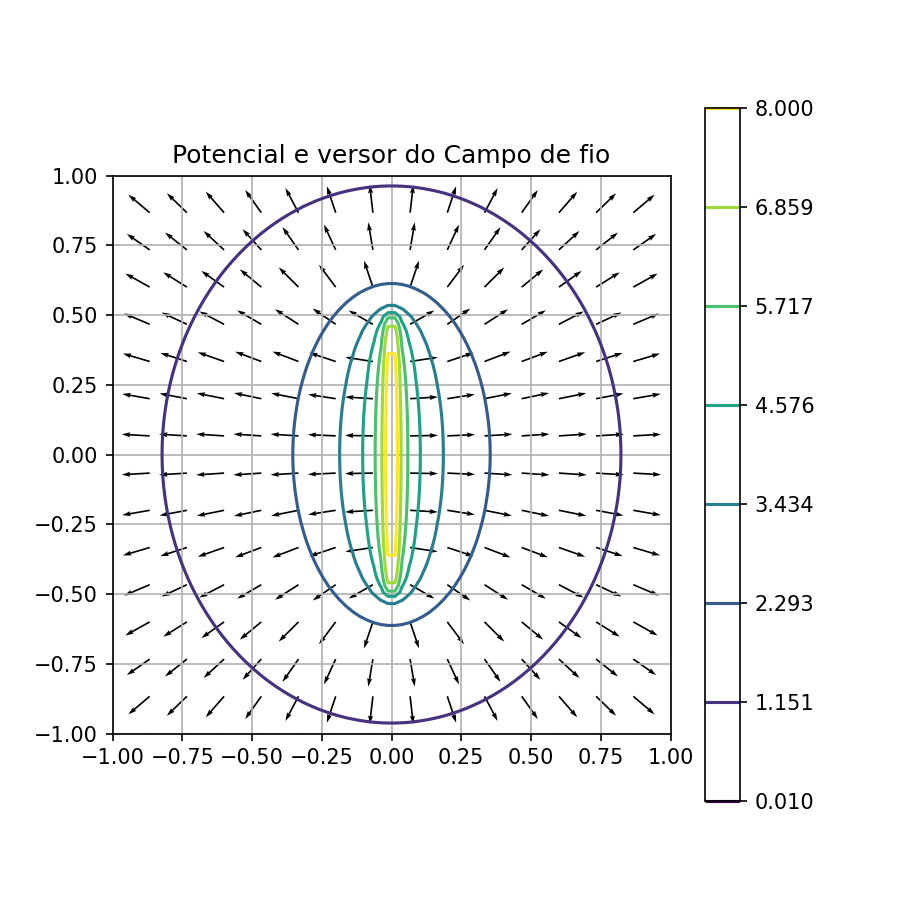

In [8]:
fig=plt.figure(figsize=(6,6))                    # cria uma figura de tamanho 8x8
ax = fig.add_subplot(111,aspect='equal')         # cria um gráfico com sistema de eixos na figura    

max_r =1                                         # para definir limites de r e z   
max_z = 1
#max_r =.5
#max_z = .25

linhas=np.linspace(.01,8,8)         # determina valores da função para os contornos a 
                                    # contornos a representar
#    
                                    # definição da grelha de pontos onde a função é
points=80                           # calculada
r = np.linspace(-max_r,max_r,points) 
z = np.linspace(-max_z,max_z, points)
#
potencial=np.zeros((points,points),float)        # array para guardar valores do potencial   
for k in range(points):                          # cálculo do potencial
    for m in range(points):
        potencial[k,m],erro =Vfio(z[k],r[m])     # o potencial é igualado ao primeiro elemento do tuplo; o segundo 
                                                 # ao erro; neste exemplo não o usamos
#
# Gráfico do Potencial                                
CS = ax.contour(r,z, potencial,levels=linhas)
plt.title('Potencial e versor do Campo de fio', fontsize=12);
plt.colorbar(CS);
# countor filled
#CS = ax.contourf(X, Y, Z1,levels=linhas)
plt.grid(True)
#
# Grafico do campo
#
points=16                             
r = np.linspace(-max_r,max_r,points) 
z = np.linspace(-max_z,max_z, points)
for j in range(points):
    for k in range(points):
        Z =z[j]
        R=r[k]
        Emod=np.sqrt(Ez(Z,R)**2+Er(Z,R)**2)            # o modulo do campo para calcular o versor
        ax.quiver(R,Z, Er(Z,R)/Emod,Ez(Z,R)/Emod,\
                  scale=20,scale_units='width', width=.003)

### Potencial de disco
Para um disco no plano $Oxy$ o potencial em $Z,R$  
$$
\begin{align*}
V(Z,R) & =\frac{\sigma}{4\pi\epsilon_{0}}\int_{0}^{a}rdr\int_{0}^{2\pi}d\theta\frac{1}{\sqrt{(Z^{2}+\left(R-r\cos\theta\right)^{2}+r^{2}\sin^{2}(\theta)}}\\
 & =\frac{\sigma}{4\pi\epsilon_{0}}\int_{0}^{a}rdr\int_{0}^{2\pi}d\theta\frac{1}{\sqrt{(Z^{2}+R^{2}+r^{2}-2Rr\cos\theta}}\\
 & =\frac{\sigma}{4\pi\epsilon_{0}a}\int_{0}^{1}udu\int_{0}^{2\pi}d\theta\frac{1}{\sqrt{(Z/a)^{2}+(R/a)^{2}+u^{2}-2u(R/a)\cos\theta}}
\end{align*}
$$

In [7]:
def Vdisco(Z,R):
    pot = lambda q,u: u/np.sqrt(Z**2+R**2+u**2-2*u*R*np.cos(q))
    return integrate.dblquad(pot,0,1,lambda y: 0, lambda y: 2*np.pi )[0]  # devolve apenas valor


In [8]:
Vdisco(1,2)

1.417296488882517

<IPython.core.display.Javascript object>


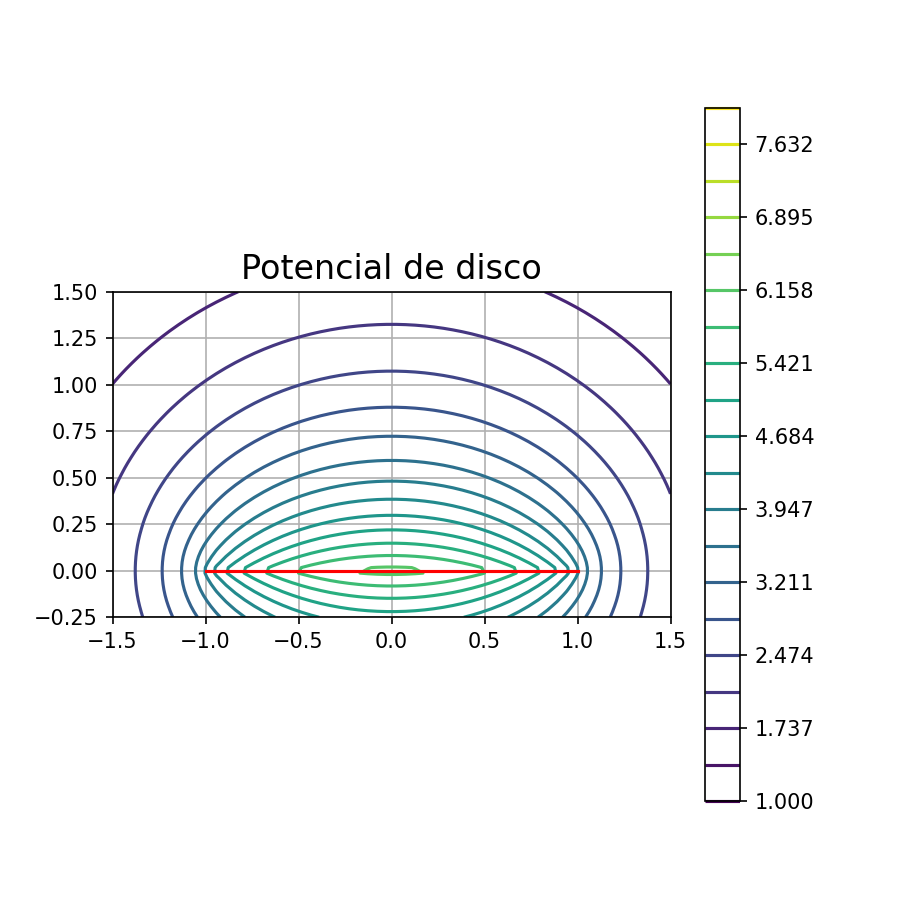

In [9]:
fig=plt.figure(figsize=(6,6))                    # cria uma figura de tamanho 8x8
ax = fig.add_subplot(111,aspect='equal')    

max_r =1.5
max_z = 1.5
#max_z = .25

#linhas=np.linspace(4,7,20)         # determina valores da função para os contornos a 
linhas=np.linspace(1,8,20)                                      # contornos a representar
                                      # definição da grelha de pontos onde a função é
points=60                             # calculada
r = np.linspace(-max_r,max_r,points) 
z = np.linspace(-.25,max_z, points)
potencial=np.zeros((points,points),float)   # array para potencial

for k in range(points):
    for m in range(points):
        potencial[k,m]=Vdisco(z[k],r[m])
CS = ax.contour(r,z, potencial,levels=linhas)
plt.plot(np.linspace(-1,1,20),np.zeros(20,float),'r-')   # desenho do Disco
plt.title('Potencial de disco', fontsize=16);
plt.colorbar(CS);
# countor filled
#CS = ax.contourf(X, Y, Z1,levels=linhas)
plt.grid(True)

<IPython.core.display.Javascript object>


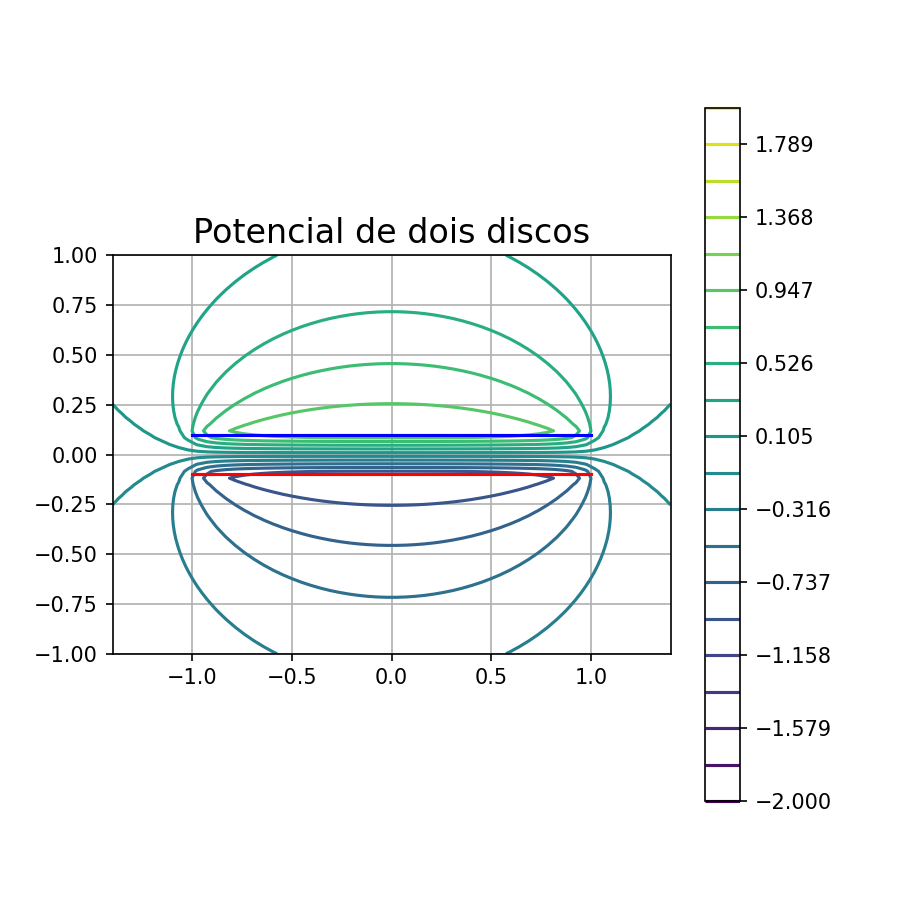

In [10]:
fig=plt.figure(figsize=(6,6))                    # cria uma figura de tamanho 6x6
ax = fig.add_subplot(111,aspect='equal')         #escalas indênticas para eixos x e y 

max_r =1.4
max_z = 1
#max_r =.5
#max_z = .25

linhas=np.linspace(-2,2,20)            # determina valores da função para os contornos a 
                                       # representar
                                      
points=60                              #  definição da grelha de pontos onde a função é calculada
r = np.linspace(-max_r,max_r,points)   
z = np.linspace(-max_z,max_z, points)
potencial=np.zeros((points,points),float)    # array para valores do potencial
d=.2                                         # separação entre placas 
#
for k in range(points):                      # cálculo do potencial
    for m in range(points):
        potencial[k,m]=Vdisco(z[k]-d/2,r[m])-Vdisco(z[k]+d/2,r[m])
#
CS = ax.contour(r,z, potencial,levels=linhas)     
plt.title('Potencial de dois discos', fontsize=16);
plt.colorbar(CS);
# countor filled
#CS = ax.contourf(X, Y, Z1,levels=linhas)
plt.grid(True)
plt.plot(np.linspace(-1,1,20),d*np.ones(20,float)/2,'b-')
plt.plot(np.linspace(-1,1,20),-d*np.ones(20,float)/2,'r-')
    